In [3]:
%matplotlib inline
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

# Initializing the variables
init = tf.global_variables_initializer()



Epoch: 0001 cost= 0.916057885 W= 0.47317377 b= 0.60594016
Epoch: 0051 cost= 0.079672068 W= 0.27874494 b= 0.591754
Epoch: 0101 cost= 0.079360180 W= 0.27701107 b= 0.6042271
Epoch: 0151 cost= 0.079084396 W= 0.2753802 b= 0.61595935
Epoch: 0201 cost= 0.078840666 W= 0.2738468 b= 0.6269906
Epoch: 0251 cost= 0.078625135 W= 0.27240443 b= 0.6373668
Epoch: 0301 cost= 0.078434609 W= 0.27104786 b= 0.647126
Epoch: 0351 cost= 0.078266203 W= 0.269772 b= 0.6563042
Epoch: 0401 cost= 0.078117333 W= 0.26857212 b= 0.66493654
Epoch: 0451 cost= 0.077985749 W= 0.26744333 b= 0.67305636
Epoch: 0501 cost= 0.077869415 W= 0.26638177 b= 0.68069357
Epoch: 0551 cost= 0.077766605 W= 0.26538327 b= 0.6878765
Epoch: 0601 cost= 0.077675760 W= 0.26444417 b= 0.6946321
Epoch: 0651 cost= 0.077595457 W= 0.26356092 b= 0.7009866
Epoch: 0701 cost= 0.077524491 W= 0.2627302 b= 0.7069626
Epoch: 0751 cost= 0.077461787 W= 0.26194888 b= 0.7125836
Epoch: 0801 cost= 0.077406392 W= 0.261214 b= 0.7178701
Epoch: 0851 cost= 0.077357456 W= 0.

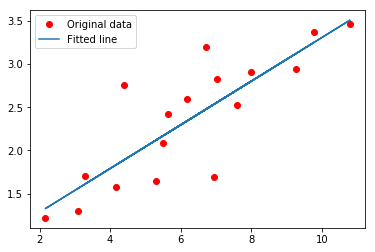

In [4]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    print("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
